In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

In [104]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = [0 , 0.5]
std = 0.1
pi = []

for k in range(K):
    N = 10
    pi.append(1 / K)
    X = np.random.normal(loc = means[k] , scale = std , size = N)
    for i in range(N):
        df.loc[len(df)] = [X[i] , 0 , k]

df

,X,Y,Class
0,0.124387,0.0,0.0
1,-0.043436,0.0,0.0
2,0.047117,0.0,0.0
3,-0.013993,0.0,0.0
4,0.176213,0.0,0.0
5,0.096967,0.0,0.0
6,-0.145880,0.0,0.0
7,0.025367,0.0,0.0
8,0.114637,0.0,0.0
9,-0.012688,0.0,0.0


<Axes: xlabel='X', ylabel='Count'>

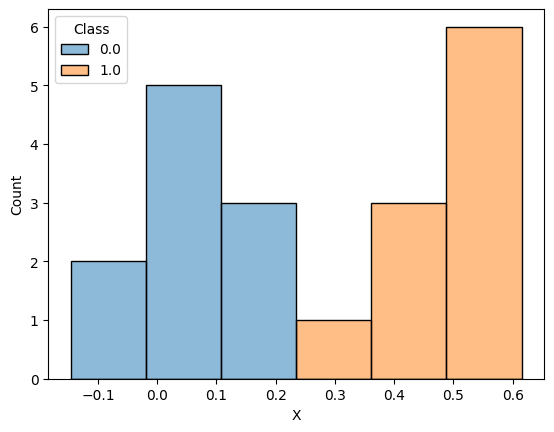

In [105]:
sns.histplot(data = df , x='X' , hue = "Class" , bins=6)

<Axes: xlabel='X', ylabel='Y'>

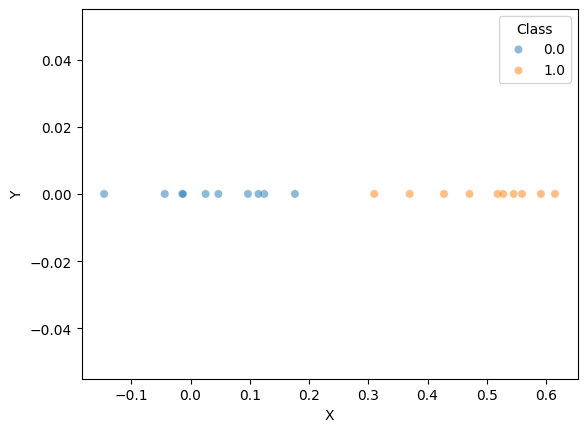

In [106]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

- 2 Classes are generated with the same standard deviation but different mean.

In [107]:
PI = math.pi
sigma = std

def f(k , x): # The LDA equation for p = 1
    return (1 / math.sqrt(2 * PI * sigma * sigma)) * math.exp(-(1/(2 * sigma * sigma)) * (x - means[k]) ** 2)

- With the $f_k(x)$ function above, we can calculate the probability that $x$ falls into class $k$.

In [111]:
x = 0

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 99.99962733607158%
Probability that x would fall in class 1 = 0.0003726639284186568%


- For the result above, it's too obvious that $x = 0$ will falls into the first class.
- Lets make another example but less obvious.

In [115]:
x = 0.27

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 26.894142136999495%
Probability that x would fall in class 1 = 73.1058578630005%


- Here, we see that the point $x = 0.27$ is somewhere in the middle of 2 classes. The LDA model predicts that $x$ fits best for the second class as the probability ~ 73.1%.